In [40]:
import networkx as nx
import pydot

def nodes_with_single_connection(dot_file_path):
    graph = pydot.graph_from_dot_file(dot_file_path)
    
    G = nx.Graph()
    for edge in graph[0].get_edges():
        source, destination = edge.get_source(), edge.get_destination()
        G.add_edge(source, destination)

    single_connection_nodes = [node for node, degree in G.degree() if degree == 1]
    return single_connection_nodes

dot_file_path = 'Datasets/LesMiserables.dot'
single_connection_nodes = nodes_with_single_connection(dot_file_path)

print("Nodes with only one connection:", single_connection_nodes)

Nodes with only one connection: ['1', '5', '6', '7', '8', '9', '10', '12', '14', '15', '16', '33', '41', '46', '54', '68', '48']


In [69]:
import networkx as nx
import pydot

def nodes_sorted_by_degree(dot_file_path):
    graph = pydot.graph_from_dot_file(dot_file_path)
    
    G = nx.Graph()
    for edge in graph[0].get_edges():
        source, destination = edge.get_source(), edge.get_destination()
        G.add_edge(source, destination)

    sorted_nodes = sorted(G.nodes(), key=G.degree, reverse=True)
    return sorted_nodes #

dot_file_path = 'Datasets/LesMiserables.dot'
sorted_nodes = nodes_sorted_by_degree(dot_file_path)

print("Nodes sorted by degree:", sorted_nodes)


Nodes sorted by degree: ['11', '49', '56', '28', '26', '24', '59', '65', '63', '64', '66', '25', '27', '42', '58', '60', '62', '2', '69', '70', '71', '67', '72', '18', '61', '30', '50', '52', '17', '19', '20', '21', '22', '23', '76', '77', '35', '36', '37', '38', '39', '29', '32', '55', '3', '4', '44', '73', '43', '40', '13', '34', '45', '31', '51', '47', '74', '75', '57', '53', '1', '5', '6', '7', '8', '9', '10', '12', '14', '15', '16', '33', '41', '46', '54', '68', '48']


In [70]:
import networkx as nx
import pydot
from itertools import groupby

def nodes_grouped_by_degree(dot_file_path):
    graph = pydot.graph_from_dot_file(dot_file_path)
    
    G = nx.Graph()
    for edge in graph[0].get_edges():
        source, destination = edge.get_source(), edge.get_destination()
        G.add_edge(source, destination)

    sorted_nodes = sorted(G.nodes(), key=G.degree, reverse=True)
    
    grouped_nodes = [list(group) for key, group in groupby(sorted_nodes, key=G.degree)]
    return grouped_nodes

dot_file_path = 'Datasets/LesMiserables.dot'
grouped_nodes = nodes_grouped_by_degree(dot_file_path)

print("Nodes grouped by degree:", grouped_nodes)


Nodes grouped by degree: [['11'], ['49'], ['56'], ['28'], ['26'], ['24', '59'], ['65', '63'], ['64', '66'], ['25', '27', '42', '58', '60', '62'], ['2', '69', '70', '71', '67'], ['72', '18', '61'], ['30'], ['50', '52', '17', '19', '20', '21', '22', '23', '76', '77'], ['35', '36', '37', '38', '39'], ['29', '32', '55'], ['3', '4', '44', '73', '43', '40'], ['13', '34', '45', '31', '51', '47', '74', '75', '57', '53'], ['1', '5', '6', '7', '8', '9', '10', '12', '14', '15', '16', '33', '41', '46', '54', '68', '48']]


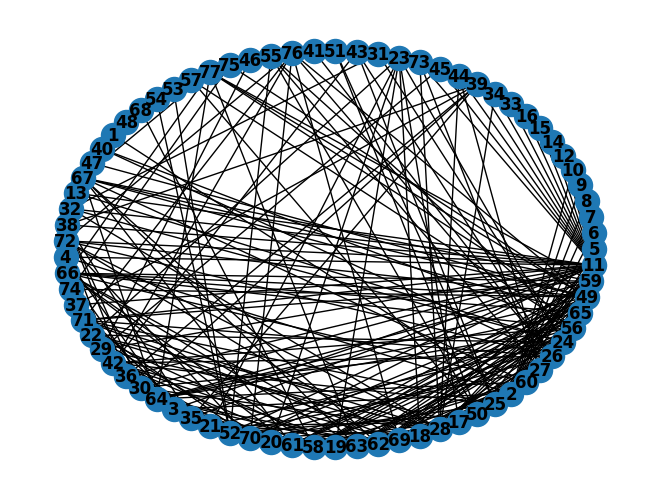

In [53]:
import pydot
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

def radial_layout(G):
    pos = {}
    nodes = list(G.nodes())
    n = len(nodes)

    # Extracting weights from the edges in dot
    weights = nx.get_edge_attributes(G, 'weight')

    # Sorting nodes based on their total edge weights so they re closer
    nodes_sorted = sorted(nodes, key=lambda x: sum(weights.get(edge, 0) for edge in G.edges(x)))

    interval = 2.0 * np.pi / n  # Define the interval between nodes

    for i, node in enumerate(nodes_sorted):
        theta = i * interval
        pos[node] = np.array([np.cos(theta), np.sin(theta)])

    return pos

def plot_radial_layout(G):
    pos = radial_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold')
    plt.show()

def get_data(dot_file_path):
    with open(dot_file_path, 'r') as dot_file:
        dot_data = dot_file.read()

    graph = pydot.graph_from_dot_data(dot_data)

    G = nx.Graph()  # directed graph
    for edge in graph[0].get_edges():
        source, destination = edge.get_source(), edge.get_destination()
        # Convert weight to float if it's a string
        weight = float(edge.get_attributes().get('weight', 1))
        G.add_edge(source, destination, weight=weight)

    return G

graph = get_data('Datasets/LesMiserables.dot')
plot_radial_layout(graph)


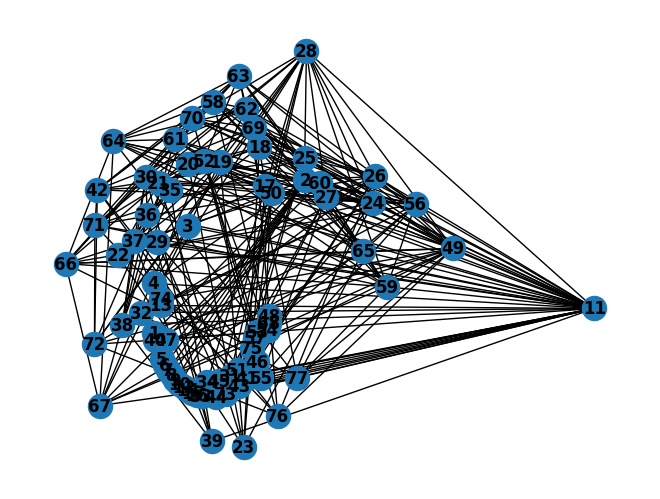

In [77]:
import numpy as np
import networkx as nx
import pydot
import matplotlib.pyplot as plt

def radial_layout(G):
    pos = {}
    nodes = list(G.nodes())
    n = len(nodes)

    # Extracting weights from the edges in dot
    weights = nx.get_edge_attributes(G, 'weight')

    # Sorting nodes based on their total edge weights so they're closer
    nodes_sorted = sorted(nodes, key=lambda x: sum(weights.get(edge, 0) for edge in G.edges(x)), reverse=True)

    interval = 2.0 * np.pi / n  # Define the interval between nodes

    for i, node in enumerate(nodes_sorted):
        theta = i * interval

        if G.degree(node) == 1:
            radius = 1.5  # Adjust the radius as needed
        else:
            radius_increment = 0.25 * (G.degree(node) - 2)  # Increment by 0.25 for each additional connection
            radius = 1.25 + radius_increment

        pos[node] = np.array([radius * np.cos(theta), radius * np.sin(theta)])

    return pos

def plot_radial_layout(G):
    pos = radial_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold')
    plt.show()

def get_data(dot_file_path):
    with open(dot_file_path, 'r') as dot_file:
        dot_data = dot_file.read()

    graph = pydot.graph_from_dot_data(dot_data)

    G = nx.Graph()
    for edge in graph[0].get_edges():
        source, destination = edge.get_source(), edge.get_destination()
        # Convert weight to float if it's a string
        weight = float(edge.get_attributes().get('weight', 1))
        G.add_edge(source, destination, weight=weight)

    return G

# Example usage:
dot_file_path = 'Datasets/LesMiserables.dot'
graph = get_data(dot_file_path)
plot_radial_layout(graph)


Node	Radial Distance
1	51.50
2	29.00
3	46.50
4	46.50
5	51.50
6	51.50
7	51.50
8	51.50
9	51.50
10	51.50
11	36.00
12	51.50
13	49.00
14	51.50
15	51.50
16	51.50
24	16.50
25	26.50
26	14.00
27	26.50
28	11.50
29	44.00
30	34.00
32	44.00
33	51.50
34	49.00
35	39.00
36	39.00
37	39.00
38	39.00
39	39.00
44	46.50
45	49.00
49	1.00
50	36.50
52	36.50
56	6.50
59	16.50
65	21.50
69	29.00
70	29.00
71	29.00
72	31.50
73	46.50
17	36.50
18	31.50
19	36.50
20	36.50
21	36.50
22	36.50
23	36.50
31	49.00
42	26.50
43	46.50
51	49.00
40	46.50
41	51.50
76	36.50
55	44.00
46	51.50
47	49.00
58	26.50
60	26.50
61	31.50
62	26.50
63	21.50
64	24.00
66	24.00
67	29.00
74	49.00
75	49.00
77	36.50
57	49.00
53	49.00
54	51.50
68	51.50
48	51.50


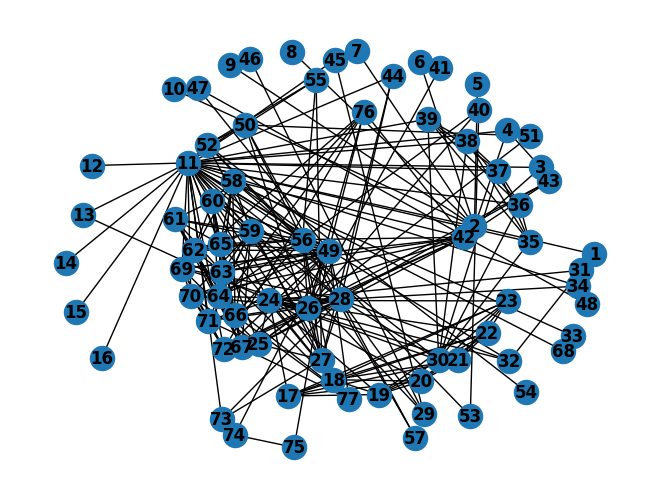

In [105]:
import pydot
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

def radial_layout_grouped_incremental_centered(G):
    pos = {}
    n = len(G.nodes)

    interval = 6.0 * np.pi / n  # Define the interval between nodes

    max_degree = max(dict(G.degree()).values())
    center_radius = 1.5 * max_degree  # Adjust the center radius based on the maximum degree
    print("Node\tRadial Distance")

    for i, node in enumerate(G.nodes):
        theta = i * interval

        radius_increment = 2.5 * (G.degree(node))  # Increment by 2 for each additional connection
        radius = abs(center_radius - radius_increment)  # Subtract for a decreasing radius towards the center, abs to prevent negative value for 11
        #radius = max(center_radius - radius_increment, 0)

        pos[node] = np.array([radius * np.cos(theta), radius * np.sin(theta)])
        print(f"{node}\t{radius:.2f}")

    return pos

def plot_radial_layout_grouped_incremental_centered(G):
    pos = radial_layout_grouped_incremental_centered(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold')
    plt.show()

def get_data(dot_file_path):
    with open(dot_file_path, 'r') as dot_file:
        dot_data = dot_file.read()

    graph = pydot.graph_from_dot_data(dot_data)

    G = nx.Graph()  # undirected graph
    for edge in graph[0].get_edges():
        source, destination = edge.get_source(), edge.get_destination()
        G.add_edge(source, destination)

    return G

dot_file_path = 'Datasets/LesMiserables.dot'
graph = get_data(dot_file_path)
plot_radial_layout_grouped_incremental_centered(graph)
